# Aprendizagem - Homework III
### II. Programming - Grupo99
(ist1106059, ist1106329)

5- 

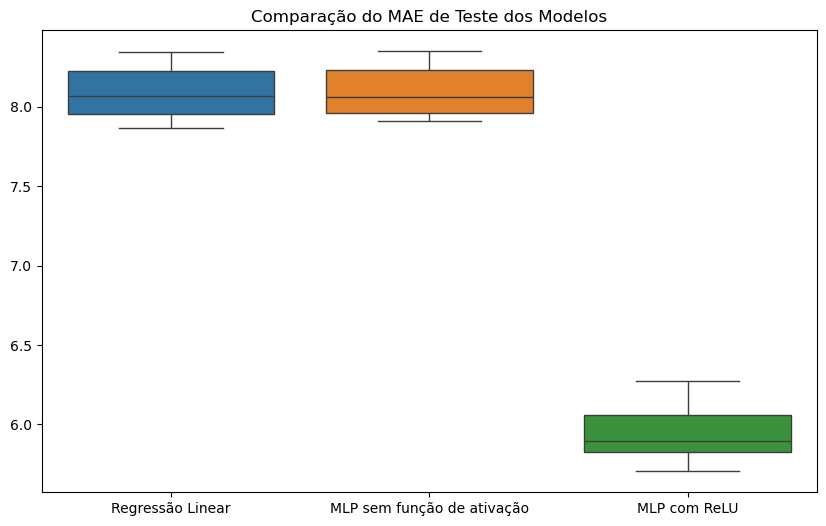

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('parkinsons.csv')

# Separar features do target
X = data.drop(columns=['target'])
y = data['target']

# MAE's de cada modelo
mae_linear = []
mae_mlp_noAct = []
mae_mlp_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Modelo de Regressão Linear
    linear_reg = LinearRegression().fit(X_train, y_train)
    mae_linear.append(MAE(y_test, linear_reg.predict(X_test)))
    
    #Regressor MLP sem funções de ativação
    mlp_noAct_reg = MLPRegressor(hidden_layer_sizes=(10, 10), 
                                 activation='identity', 
                                 random_state=0).fit(X_train, y_train)
    mae_mlp_noAct.append(MAE(y_test, mlp_noAct_reg.predict(X_test)))
    
    #Regressor MLP com funções de ativação ReLU
    mlp_relu_reg = MLPRegressor(hidden_layer_sizes=(10, 10), 
                                activation='relu', 
                                random_state=0).fit(X_train, y_train)
    mae_mlp_relu.append(MAE(y_test, mlp_relu_reg.predict(X_test)))

plt.figure(figsize=(10,6))
sns.boxplot(data=[mae_linear, mae_mlp_noAct, mae_mlp_relu])
plt.title('Comparação do MAE de Teste dos Modelos')
plt.xticks([0, 1, 2], ['Regressão Linear', 'MLP sem função de ativação', 'MLP com ReLU'])
plt.ylabel('')
plt.show()


6-

Ao analisar os boxplots da pergunta anterior, podemos tirar 2 conclusões.

Em primeiro lugar, a performance do modelo de Regressão Linear é quase idêntica à do MLP sem função de ativação. Isto acontece porque, sem a função de ativação, o valor de output dos neurónios de cada camada não passa de uma combinação linear dos pesos com os inputs e, por isso, não consegue captar relações complexas e não lineares nos dados.

Em contraste com isso, o MLP com a função de ativação ReLu já consegue captar estes padrões não lineares e, por isso, apresenta um desempenho significativamente melhor e mais estável que os outros dois modelos (que é equivalente a apresentar um MAE menor), como pode ser observado no boxplot.


7-

Melhores parâmetros: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
MAE no conjunto de teste com o melhor modelo: 4.563311573351935


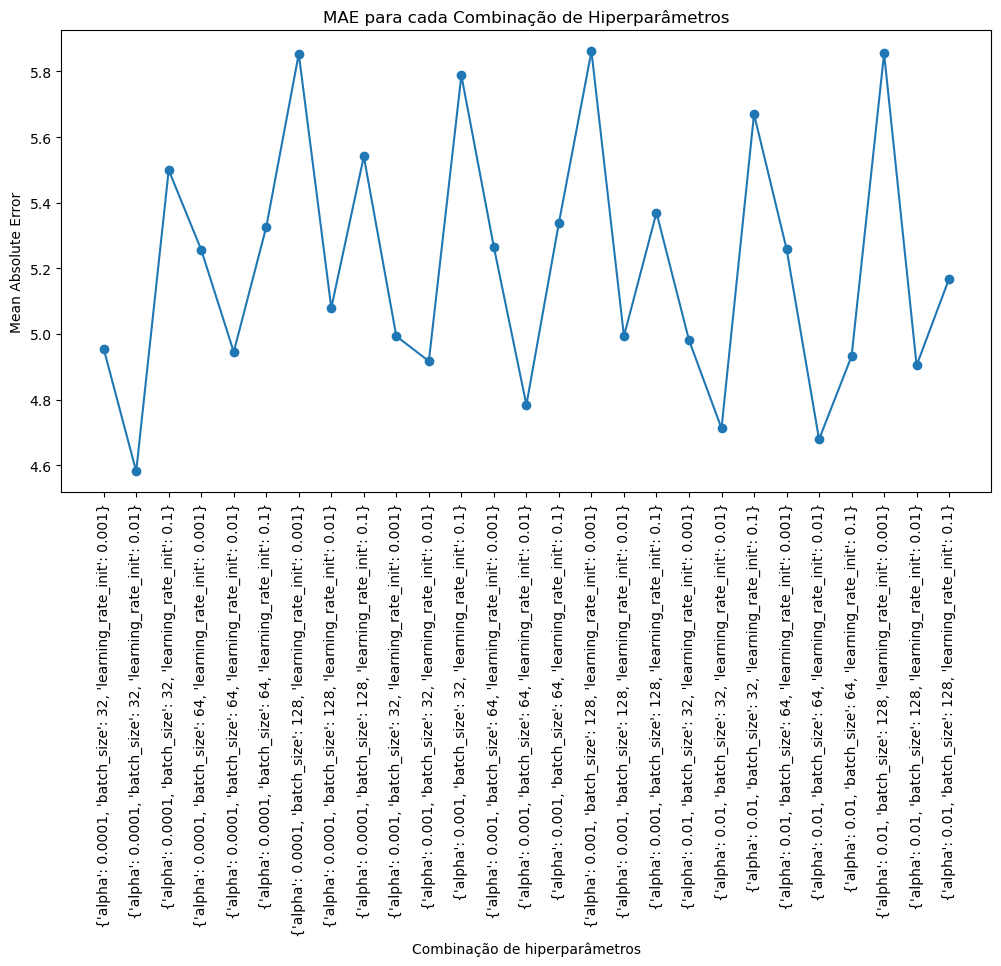

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

mlp_reg = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid_search = GridSearchCV(estimator=mlp_reg, param_grid=param_grid, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
mae_grid = MAE(y_test, best_model.predict(X_test))

print(f"Melhores parâmetros: {best_params}")
print(f"MAE no conjunto de teste com o melhor modelo: {mae_grid}")

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12,6))

plt.plot(range(len(results['params'])), -results['mean_test_score'], marker='o')
plt.xticks(range(len(results['params'])),[str(p) for p in results['params']],rotation=90)
plt.xlabel('Combinação de hiperparâmetros')
plt.ylabel('Mean Absolute Error')
plt.title('MAE para cada Combinação de Hiperparâmetros')
plt.show()

A melhor combinação para este MLP regressor é:
L2 penalty (alpha) = 0.0001;
Learning rate = 0.01;
Batch size = 32.

Para começar, o L2 penalty é um termo de regularização da função de custo para penalizar coeficientes com valores maiores, de forma a tornar o modelo mais ou menos simples e ajustar a sua generalização. Quanto menor for este valor, menos regularizado é o modelo, logo, irá apresentar um maior risco de overfitting e o contrário pode levar a um aumento no risco de underfitting.

Quanto ao learning rate, este é um parâmetro que controla o tamanho dos passos/ajustes que o modelo dá aos seus coeficientes (pesos e biases) durante o treino, baseando-se no gradiente da função de custo. Este valor deve ser equilibrado uma vez que learning rates demasiado elevadas levam a um modelo instável com um maior risco de evitar/saltar o mínimo global, já que as atualizações dos coeficientes são maiores.  Por outro lado, learning rates muito pequenas aumentam o número de atualizações necessárias para encontrar este ponto ótimo dos coeficientes.

Por fim, o batch size é um parâmetro que evita fazer o cálculo do gradiente da função de custo para todos os dados, dando-nos o número de observações usadas de cada vez para fazer a atualização dos coeficientes. Quanto menor for este número, mais rápida e "barata" é cada atualização de computar, mas mais frequente são as atualizações e mais sensível é a ruídos nos dados. Isto faz com que a função de custo tenha mais oscilações e demore mais tempo a convergir para um mínimo global (ainda que, por explorar mais o espaço de soluções, seja melhor a escapar de mínimos locais do que se o batch size for maior). Valores maiores de batch size levam a consequências opostas.

Estes valores e trade-offs dependem de modelo para modelo e do objetivo e natureza dos dados. Ao observar o gráfico acima e a melhor combinação de parâmetros obtida para este MLP em concreto, conseguimos concluir que:
•	o melhor valor de L2 penalty é o menor (0.0001) dos disponibilizados, indicando que valores maiores aumentam o underfitting do modelo e, por consequência, diminuem o seu desempenho.
•	o melhor valor da learning rate é 0.01 que corresponde ao valor intermédio, ou seja, um valor equilibrado para o tamanho dos saltos das atualizações dos coeficientes, em oposição aos outros valores que apresentam maior risco de saltar o mínimo global ou de nem sequer encontrar este ponto.
•	o melhor valor para o batch size é 32, o menor, dando a entender que, para este modelo e dados, valores maiores têm maior risco de ficar presos em mínimos locais e por isso terem um desempenho menor.
